In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import sklearn.preprocessing
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from IPython.display import HTML, Markdown


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Epileptic Seizure Recognition.csv')

In [ ]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
data.shape

(11500, 180)

In [ ]:
cols = data.columns
y = data.y
y[y>1]=0

non_seizure, seizure = y.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


<ipython-input-6-9e7d252921cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y>1]=0


In [ ]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
print(data['y'].value_counts())

y
0    9200
1    2300
Name: count, dtype: int64


In [ ]:
data.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [ ]:
data = data.drop('Unnamed', axis = 1)
#data1=data.drop(['y'],axis=1)

In [ ]:
import imblearn

oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')

df1, y = oversample.fit_resample(data.drop('y', axis=1), data['y'])

df1.shape, y.shape

((18400, 178), (18400,))

In [ ]:
df1['y']=y
print(df1['y'].value_counts())

y
0    9200
1    9200
Name: count, dtype: int64


<ipython-input-12-6ba87d2f3b4f>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1['y']=y


In [ ]:
df1=df1.drop('y', axis=1)
df1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,-79,154,259,260,170,20,-193,-419,-558,-538,...,61,258,407,556,768,912,864,594,209,-80
18396,373,555,580,548,502,433,348,276,216,182,...,-622,-1032,-1108,-803,-377,-13,172,246,206,156
18397,-27,-19,-20,-17,-21,-27,-39,-45,-49,-57,...,-300,-293,-287,-293,-307,-317,-307,-287,-260,-240
18398,746,692,562,400,238,84,-36,-137,-211,-253,...,712,547,382,382,228,84,-40,-139,-227,-298


In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df1))
df

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.614539,0.828947,0.999369,0.978724,0.830591,0.532406,0.235210,-0.029728,-0.131328,-0.157040,...,0.069356,-0.027234,-0.005772,-0.055550,-0.231355,-0.341222,-0.450098,-0.415277,-0.283173,-0.148312
1,1.629092,1.606134,1.525282,1.433115,1.365042,1.315329,1.272921,1.130527,1.018630,0.971246,...,0.719251,0.709057,0.659441,0.647332,0.680722,0.704939,0.707203,0.701809,0.658150,0.596905
2,-0.060483,-0.098011,-0.143560,-0.115181,-0.104698,-0.131017,-0.225995,-0.293986,-0.347205,-0.391055,...,0.154654,0.273791,0.312724,0.258166,0.151000,0.024935,-0.053426,-0.080151,-0.083246,-0.086210
3,-0.355552,-0.348977,-0.346472,-0.346584,-0.342695,-0.374136,-0.411301,-0.405469,-0.355507,-0.328372,...,-0.288087,-0.291647,-0.271858,-0.250133,-0.231355,-0.268795,-0.245627,-0.233234,-0.224861,-0.206273
4,0.032484,-0.203255,-0.354754,-0.388657,-0.296766,-0.180465,-0.057161,0.007433,-0.081510,-0.244796,...,0.077479,0.058192,0.062765,0.019901,-0.052126,-0.091753,-0.196555,-0.278744,-0.308164,-0.239393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,-0.250459,0.683224,1.123600,1.134395,0.738732,0.099739,-0.786030,-1.722628,-2.310851,-2.246458,...,0.284634,1.091440,1.695562,2.275477,3.134168,3.742829,3.602500,2.522246,0.933050,-0.268374
18396,1.576546,2.306412,2.452877,2.346105,2.124964,1.801565,1.441755,1.147043,0.902388,0.762304,...,-2.489609,-4.156156,-4.412307,-3.121227,-1.426215,0.020911,0.772634,1.082446,0.920555,0.708687
18397,-0.040273,-0.017054,-0.031752,-0.031034,-0.058768,-0.093932,-0.151873,-0.178373,-0.197752,-0.236438,...,-1.181694,-1.149975,-1.102366,-1.095974,-1.147414,-1.202293,-1.186190,-1.122765,-1.020404,-0.930788
18398,3.084229,2.860967,2.378338,1.723421,1.022659,0.363460,-0.139519,-0.558243,-0.870290,-1.055490,...,2.928897,2.267064,1.594772,1.584508,0.983420,0.411209,-0.094320,-0.510436,-0.882954,-1.170914


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4, random_state=42)
X_val, X_test1, y_val, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test1))
print("Validation set size:", len(X_val))

Training set size: 11040
Testing set size: 3680
Validation set size: 3680


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    f1_score,
)

In [ ]:
models = [LogisticRegression(), SVC(kernel='rbf'),
          DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators=200),
          GradientBoostingClassifier(),
          KNeighborsClassifier(n_neighbors=5),
          GaussianNB()]

model_name = [type(model).__name__ for model in models]
print(model_name)

# all parameters are not specified are set to their defaults
def classifiers(models):
    columns = ['Accuracy','F1_Score','Predictions']
    df_result = pd.DataFrame(columns=columns, index=[type(model).__name__ for model in models])

    for model in models:
        clf = model

        clf.fit(X_train, y_train)
        #make a predicitions for entire data(X_test)
        y_pred = clf.predict(X_test1)
        # Use score method to get accuracy of model
        accuracy = accuracy_score(y_test1, y_pred)
        f1 = f1_score(y_pred, y_test1, average="weighted")
        df_result['Accuracy']['{}'.format(type(model).__name__)] = str(round(accuracy * 100, 2)) + '%'
        df_result['F1_Score']['{}'.format(type(model).__name__)] = f1
        df_result['Predictions']['{}'.format(type(model).__name__)] = y_pred
    return df_result

['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'GaussianNB']


In [ ]:
classifiers(models)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,F1_Score,Predictions
LogisticRegression,63.59%,0.642835,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, ..."
SVC,96.88%,0.968749,"[1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, ..."
DecisionTreeClassifier,96.39%,0.963884,"[1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, ..."
RandomForestClassifier,98.67%,0.986688,"[1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, ..."
GradientBoostingClassifier,97.26%,0.972554,"[1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, ..."
KNeighborsClassifier,93.78%,0.937929,"[1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, ..."
GaussianNB,92.31%,0.923234,"[1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, ..."


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6285326086956522 F1 Score: 0.6338510748358098

CONFUSION MATRIX
[[1365  454]
 [ 913  948]]



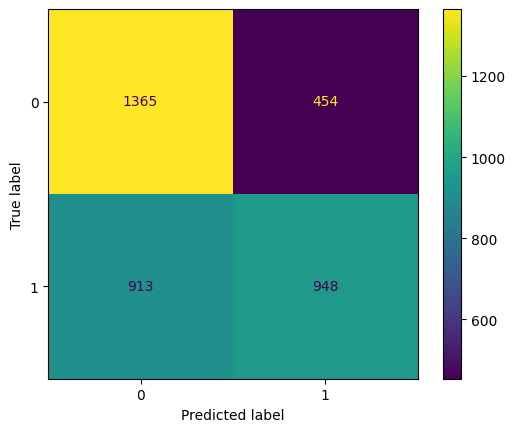

In [ ]:
#CONFUSION MATRIX
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test1)

def color_text(text, color):
    display(HTML(f'<text style=color:{color}>{text}</text>'))
text="<u><b>LOGISTIC REGRESSION</b></u>"
colored_text = color_text(text, "blue")

accuracy = accuracy_score(y_pred, y_test1)
f1 = f1_score(y_pred, y_test1, average="weighted")
print("Accuracy:", accuracy,"F1 Score:", f1)
print()
print('CONFUSION MATRIX')
print(confusion_matrix(y_test1, y_pred))
print()
labels = [0,1]
cm = confusion_matrix(y_test1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg.classes_)
disp.plot();

In [ ]:
def color_text(text, color):
    display(HTML(f'<text style=color:{color}>{text}</text>'))
text="<u><b>LOGISTIC REGRESSION</b></u>"
colored_text = color_text(text, "blue")
print()

print(classification_report(y_test1, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.75      0.67      1819
           1       0.68      0.51      0.58      1861

    accuracy                           0.63      3680
   macro avg       0.64      0.63      0.62      3680
weighted avg       0.64      0.63      0.62      3680



AUC of LOGISTIC REGRESSION:  0.592618840060393


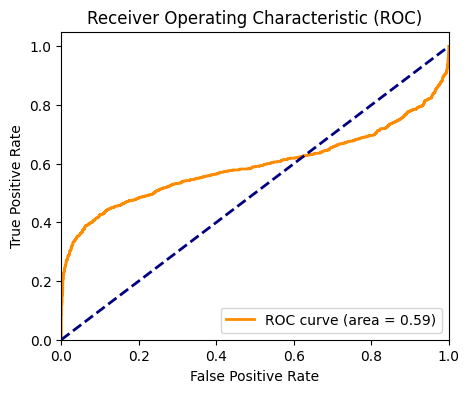

In [ ]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_prob = lg.predict_proba(X_test1)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test1, y_prob)
roc_auc = auc(fpr, tpr)
auc = roc_auc_score(y_test1, y_prob)
print('AUC of LOGISTIC REGRESSION: ', auc)
# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.9690217391304348 F1 Score: 0.969020750906126

CONFUSION MATRIX
[[1774   45]
 [  69 1792]]



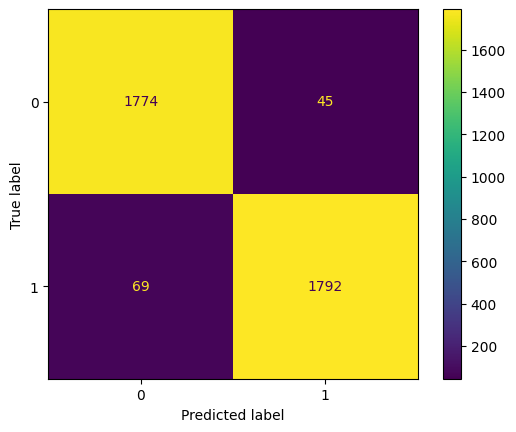

In [ ]:
#CONFUSION MATRIX
sv=SVC(probability=True)
sv.fit(X_train, y_train)
y_pred=sv.predict(X_test1)

def color_text(text, color):
    display(HTML(f'<text style=color:{color}>{text}</text>'))
text="<u><b>SUPPORT VECTOR CLASSIFIER</b></u>"
colored_text = color_text(text, "blue")

accuracy = accuracy_score(y_pred, y_test1)
f1 = f1_score(y_pred, y_test1, average="weighted")
print("Accuracy:", accuracy,"F1 Score:", f1)
print()
print('CONFUSION MATRIX')
print(confusion_matrix(y_test1, y_pred))
print()
labels = [0,1]
cm = confusion_matrix(y_test1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sv.classes_)
disp.plot();

In [ ]:
def color_text(text, color):
    display(HTML(f'<text style=color:{color}>{text}</text>'))
text="<u><b>SUPPORT VECTOR CLASSIFIER</b></u>"
colored_text = color_text(text, "blue")
print()

print(classification_report(y_test1, y_pred))



              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1819
           1       0.98      0.96      0.97      1861

    accuracy                           0.97      3680
   macro avg       0.97      0.97      0.97      3680
weighted avg       0.97      0.97      0.97      3680



AUC of SUPPORT VECTOR CLASSIFIER:  0.9937864070786631


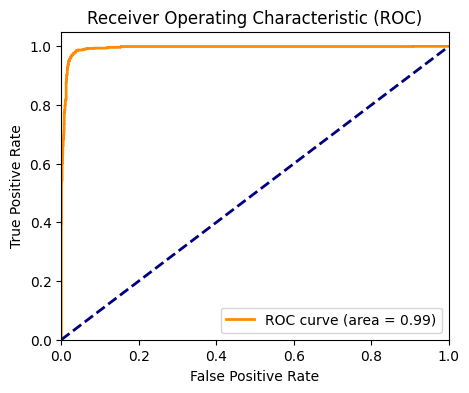

In [ ]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_prob = sv.predict_proba(X_test1)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test1, y_prob)
roc_auc = auc(fpr, tpr)
auc = roc_auc_score(y_test1, y_prob)
print('AUC of SUPPORT VECTOR CLASSIFIER: ', auc)
# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.9633152173913043 F1 Score: 0.963321924663676

CONFUSION MATRIX
[[1735   84]
 [  51 1810]]



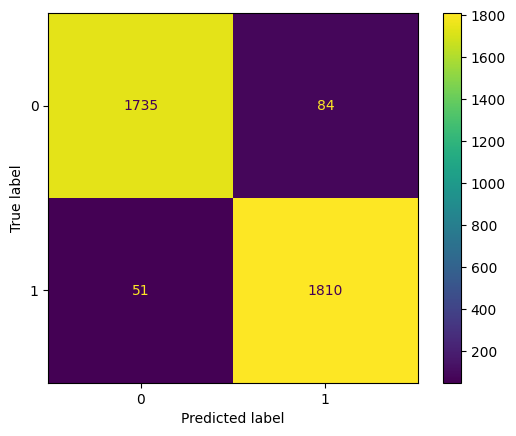

In [ ]:
#CONFUSION MATRIX
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test1)

def color_text(text, color):
    display(HTML(f'<text style=color:{color}>{text}</text>'))
text="<u><b>DECISION TREE CLASSIFIER</b></u>"
colored_text = color_text(text, "blue")

accuracy = accuracy_score(y_pred, y_test1)
f1 = f1_score(y_pred, y_test1, average="weighted")
print("Accuracy:", accuracy,"F1 Score:", f1)
print()
print('CONFUSION MATRIX')
print(confusion_matrix(y_test1, y_pred))
print()
labels = [0,1]
cm = confusion_matrix(y_test1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot();

In [ ]:
def color_text(text, color):
    display(HTML(f'<text style=color:{color}>{text}</text>'))
text="<u><b>DECISION TREE CLASSIFIER</b></u>"
colored_text = color_text(text, "blue")
print()

print(classification_report(y_test1, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1819
           1       0.96      0.97      0.96      1861

    accuracy                           0.96      3680
   macro avg       0.96      0.96      0.96      3680
weighted avg       0.96      0.96      0.96      3680



AUC of DECISION TREE CLASSIFIER:  0.9632080797386475


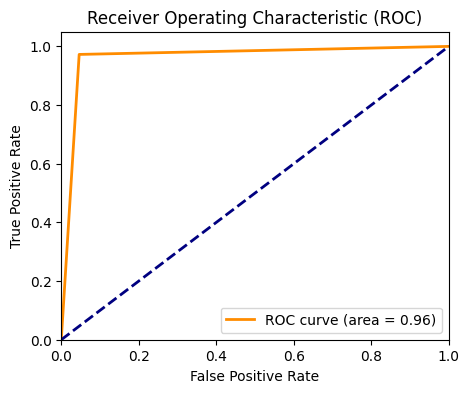

In [ ]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_prob = dt.predict_proba(X_test1)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test1, y_prob)
roc_auc = auc(fpr, tpr)
auc = roc_auc_score(y_test1, y_prob)
print('AUC of DECISION TREE CLASSIFIER: ', auc)
# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.9864130434782609 F1 Score: 0.9864171071205138

CONFUSION MATRIX

[[1771   48]
 [   2 1859]]



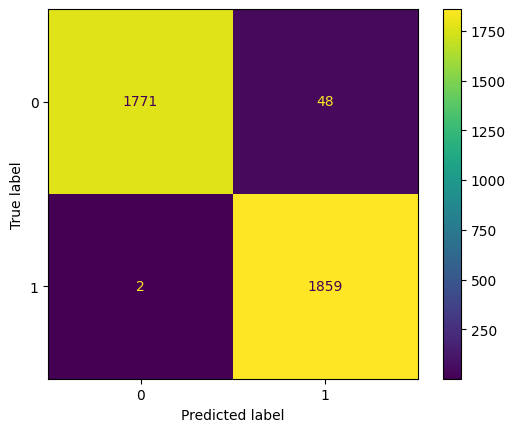

In [ ]:
#CONFUSION MATRIX
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test1)

def color_text(text, color):
    display(HTML(f'<text style=color:{color}>{text}</text>'))
text="<u><b>RANDOM FOREST CLASSIFIER</b></u>"
colored_text = color_text(text, "blue")

accuracy = accuracy_score(y_pred, y_test1)
f1 = f1_score(y_pred, y_test1, average="weighted")
print("Accuracy:", accuracy,"F1 Score:", f1)
print()
print('CONFUSION MATRIX')
print()
print(confusion_matrix(y_test1, y_pred))
print()
labels = [0,1]
cm = confusion_matrix(y_test1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot();

In [ ]:
def color_text(text, color):
    display(HTML(f'<text style=color:{color}>{text}</text>'))
text="<u><b>RANDOM FOREST CLASSIFIER</b></u>"
colored_text = color_text(text, "blue")
print()

print(classification_report(y_test1, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1819
           1       0.97      1.00      0.99      1861

    accuracy                           0.99      3680
   macro avg       0.99      0.99      0.99      3680
weighted avg       0.99      0.99      0.99      3680



AUC of RANDOM FOREST CLASSIFIER:  0.9996725412307073


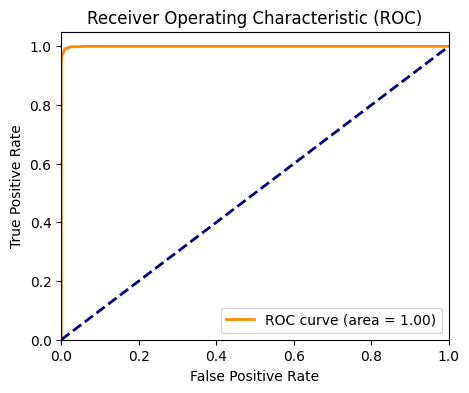

In [ ]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_prob = rf.predict_proba(X_test1)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test1, y_prob)
roc_auc = auc(fpr, tpr)
auc = roc_auc_score(y_test1, y_prob)
print('AUC of RANDOM FOREST CLASSIFIER: ', auc)
# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.9720108695652174 F1 Score: 0.9720111486219354

CONFUSION MATRIX

[[1766   53]
 [  50 1811]]



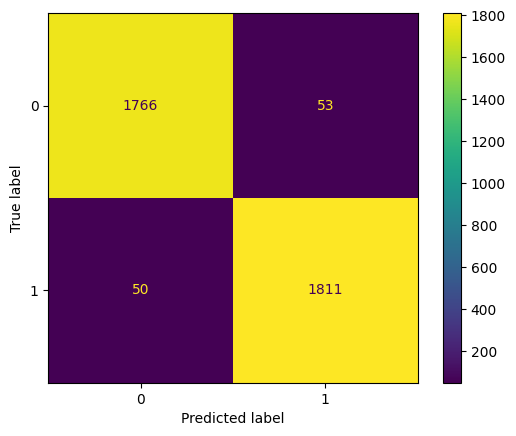

In [ ]:
#CONFUSION MATRIX
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test1)

def color_text(text, color):
    display(HTML(f'<text style=color:{color}>{text}</text>'))
text="<u><b>GRADIENT BOOSTING CLASSIFIER</b></u>"
colored_text = color_text(text, "blue")

accuracy = accuracy_score(y_pred, y_test1)
f1 = f1_score(y_pred, y_test1, average="weighted")
print("Accuracy:", accuracy,"F1 Score:", f1)
print()
print('CONFUSION MATRIX')
print()
print(confusion_matrix(y_test1, y_pred))
print()
labels = [0,1]
cm = confusion_matrix(y_test1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb.classes_)
disp.plot();

In [ ]:
def color_text(text, color):
    display(HTML(f'<text style=color:{color}>{text}</text>'))
text="<u><b>GRADIENT BOOSTING CLASSIFIER</b></u>"
colored_text = color_text(text, "blue")
print()

print(classification_report(y_test1, y_pred))




              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1819
           1       0.97      0.97      0.97      1861

    accuracy                           0.97      3680
   macro avg       0.97      0.97      0.97      3680
weighted avg       0.97      0.97      0.97      3680



AUC of GRADIENT BOOSTING CLASSIFIER:  0.9947913820296183


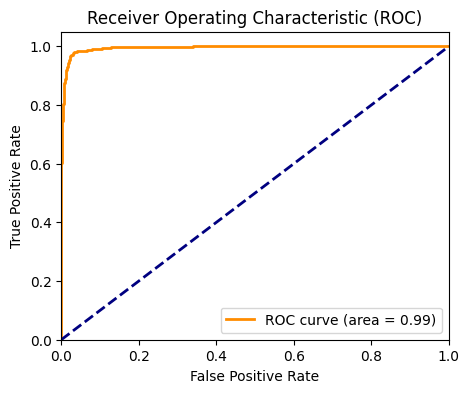

In [ ]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_prob = gb.predict_proba(X_test1)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test1, y_prob)
roc_auc = auc(fpr, tpr)
auc = roc_auc_score(y_test1, y_prob)
print('AUC of GRADIENT BOOSTING CLASSIFIER: ', auc)
# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.9385869565217392 F1 Score: 0.938720909341922

CONFUSION MATRIX
[[1803   16]
 [ 210 1651]]



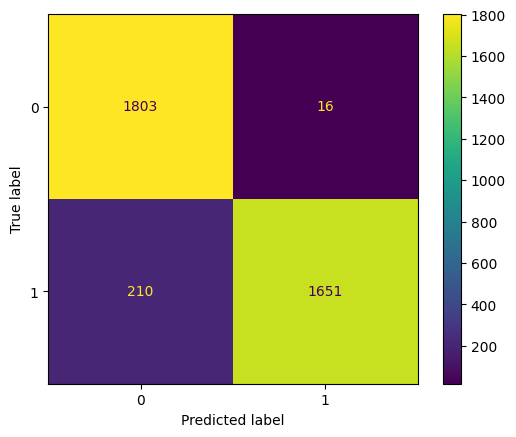

In [ ]:
#CONFUSION MATRIX
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test1)

def color_text(text, color):
    display(HTML(f'<text style=color:{color}>{text}</text>'))
text="<u><b>K NEIGHBORS CLASSIFIER</b></u>"
colored_text = color_text(text, "blue")

accuracy = accuracy_score(y_pred, y_test1)
f1 = f1_score(y_pred, y_test1, average="weighted")
print("Accuracy:", accuracy,"F1 Score:", f1)
print()
print('CONFUSION MATRIX')
print(confusion_matrix(y_test1, y_pred))
print()
labels = [0,1]
cm = confusion_matrix(y_test1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot();

In [ ]:
def color_text(text, color):
    display(HTML(f'<text style=color:{color}>{text}</text>'))
text="<u><b>K NEIGHBORS CLASSIFIER</b></u>"
colored_text = color_text(text, "blue")
print()

print(classification_report(y_test1, y_pred))



              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1819
           1       0.99      0.89      0.94      1861

    accuracy                           0.94      3680
   macro avg       0.94      0.94      0.94      3680
weighted avg       0.94      0.94      0.94      3680



AUC of K NEIGHBORS CLASSIFIER:  0.9923790876588072


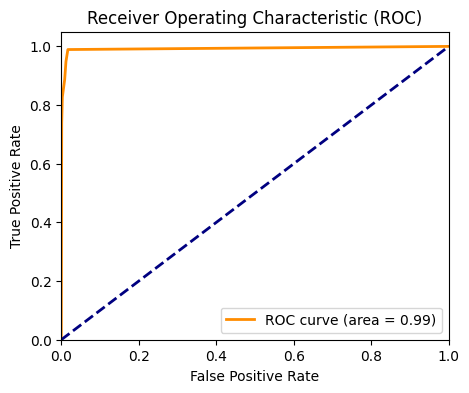

In [ ]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_prob = knn.predict_proba(X_test1)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test1, y_prob)
roc_auc = auc(fpr, tpr)
auc = roc_auc_score(y_test1, y_prob)
print('AUC of K NEIGHBORS CLASSIFIER: ', auc)
# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.9258152173913043 F1 Score: 0.9259233762125394

CONFUSION MATRIX
[[1764   55]
 [ 218 1643]]



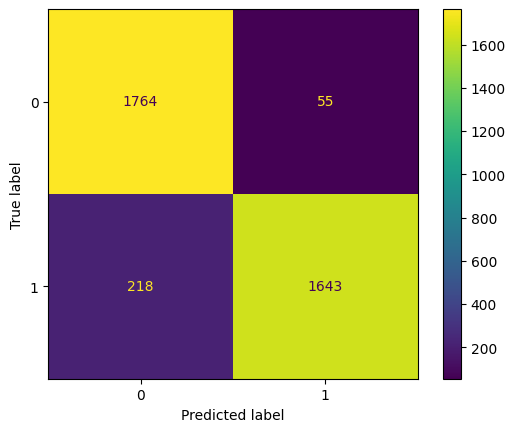

In [ ]:
#CONFUSION MATRIX
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test1)

def color_text(text, color):
    display(HTML(f'<text style=color:{color}>{text}</text>'))
text="<u><b>NAIVE BAYERS CLASSIFIER</b></u>"
colored_text = color_text(text, "blue")

accuracy = accuracy_score(y_pred, y_test1)
f1 = f1_score(y_pred, y_test1, average="weighted")
print("Accuracy:", accuracy,"F1 Score:", f1)
print()
print('CONFUSION MATRIX')
print(confusion_matrix(y_test1, y_pred))
print()
labels = [0,1]
cm = confusion_matrix(y_test1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot();

In [ ]:
def color_text(text, color):
    display(HTML(f'<text style=color:{color}>{text}</text>'))
text="<u><b>NAIVE BAYERS CLASSIFIER</b></u>"
colored_text = color_text(text, "blue")
print()

print(classification_report(y_test1, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1819
           1       0.97      0.88      0.92      1861

    accuracy                           0.93      3680
   macro avg       0.93      0.93      0.93      3680
weighted avg       0.93      0.93      0.93      3680



AUC of NAIVE BAYERS:  0.9829061205101444


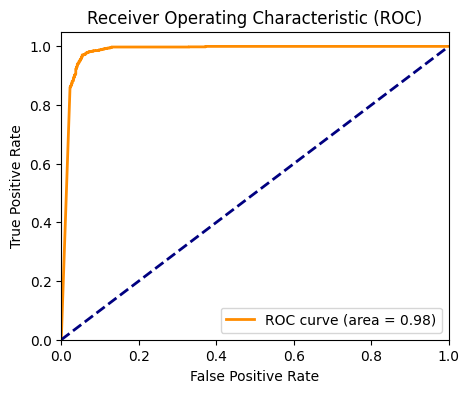

In [ ]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_prob = nb.predict_proba(X_test1)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test1, y_prob)
roc_auc = auc(fpr, tpr)
auc = roc_auc_score(y_test1, y_prob)
print('AUC of NAIVE BAYERS: ', auc)
# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()